<a href="https://colab.research.google.com/github/laresamdeola/ML-Mastery/blob/main/Building_a_Naive_Bayes_Model_for_predicting_if_a_customer_would_purchase_Social_Media_Ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("Social_Network_Ads.csv")

In [14]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [19]:
print(cm)

[[65  3]
 [ 7 25]]


In [20]:
print(acc)

0.9


In [21]:
from sklearn.metrics import roc_curve, auc
probs = classifier.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

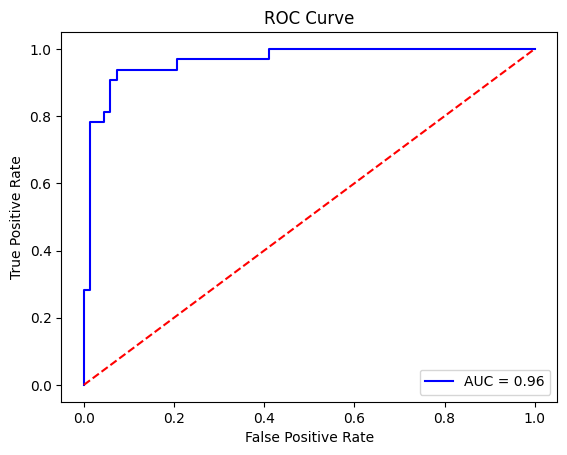

In [22]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()